
#### AIM:
* In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not



#### USE:

* This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
* Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

##### Applied Models:


* Linear Regression


## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('Mobile_Project.csv')

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Visualization & Analysis

In [6]:
dataset['price_range'].max()

3

### How does ram is affected by price

<BarContainer object of 2000 artists>

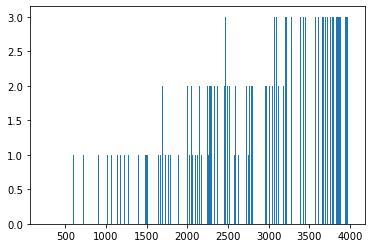

In [7]:
# sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');
# plt.figure(figsize=(10,6))
# dataset['ram'].hist(alpha=0.5,color='blue',label='F')
# dataset['price_range'].hist(alpha=0.5,color='red',label='P')
# plt.legend()
# plt.xlabel('MegaPixels')
plt.bar(dataset['ram'],dataset['price_range'])

### Internal Memory vs Price Range

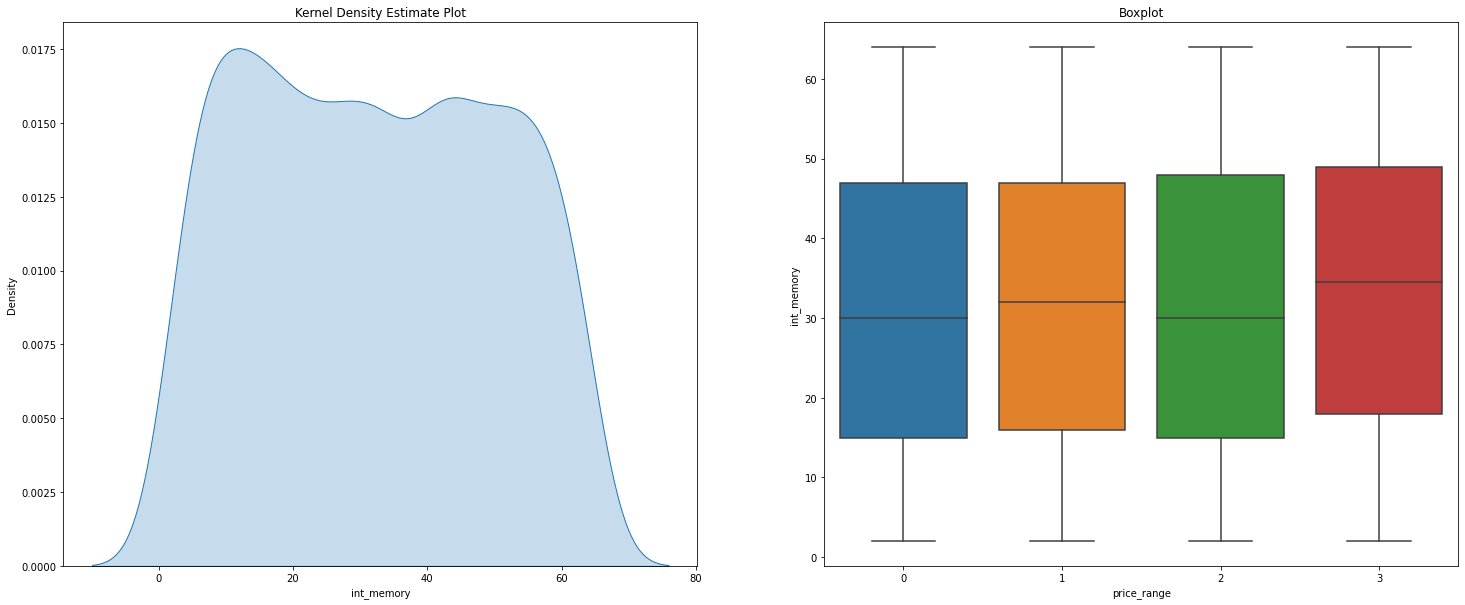

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(25, 10))

# Kernel Density Estimate plot
sns.kdeplot(ax=ax[0], data=dataset['int_memory'], shade=True)
ax[0].set_title('Kernel Density Estimate Plot')

# Boxplot
sns.boxplot(ax=ax[1], x="price_range", y="int_memory", data=dataset)
ax[1].set_title('Boxplot')

plt.show()


<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

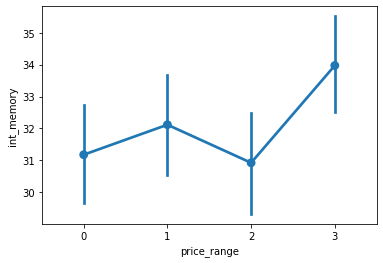

In [9]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

In [10]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

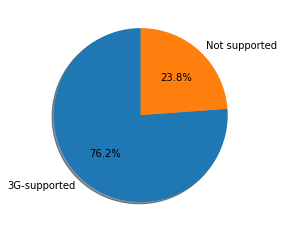

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


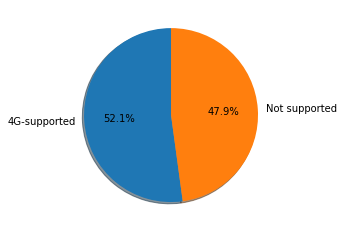

In [12]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

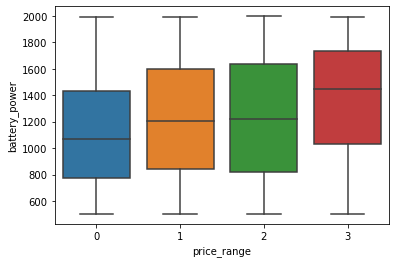

In [13]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

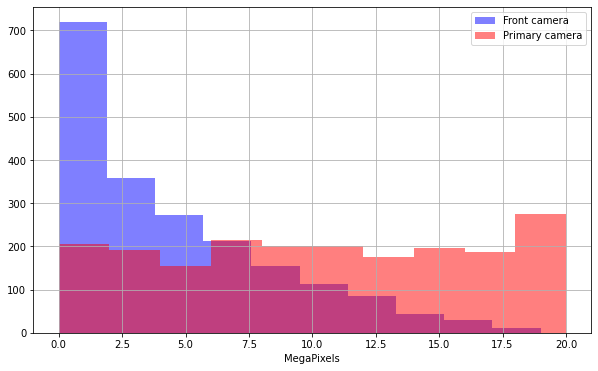

In [14]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

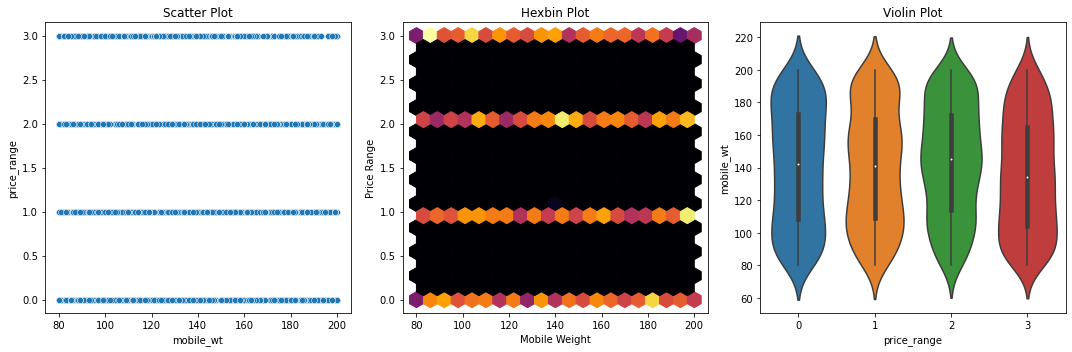

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot
sns.scatterplot(x='mobile_wt', y='price_range', data=dataset, ax=ax[0])
ax[0].set_title('Scatter Plot')

# Hexbin plot
ax[1].hexbin(x=dataset['mobile_wt'], y=dataset['price_range'], gridsize=20, cmap='inferno')
ax[1].set_xlabel('Mobile Weight')
ax[1].set_ylabel('Price Range')
ax[1].set_title('Hexbin Plot')

# Violin plot
sns.violinplot(x='price_range', y='mobile_wt', data=dataset, ax=ax[2])
ax[2].set_title('Violin Plot')

plt.tight_layout()
plt.show()



# talk_time vs Price range

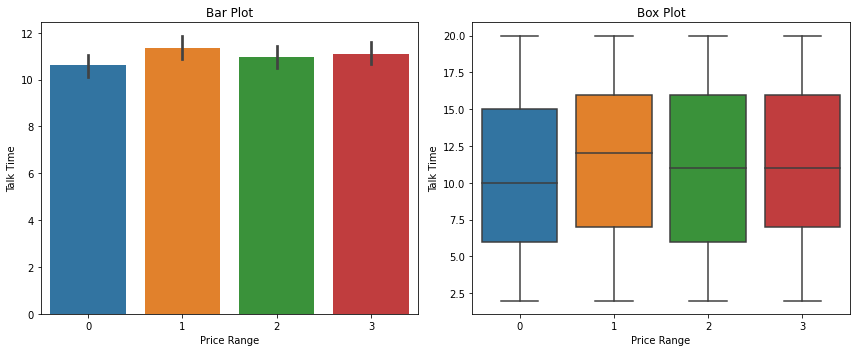

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Bar Plot
sns.barplot(ax=axes[0], x="price_range", y="talk_time", data=dataset)
axes[0].set_xlabel("Price Range")
axes[0].set_ylabel("Talk Time")
axes[0].set_title("Bar Plot")

# Box Plot
sns.boxplot(ax=axes[1], x="price_range", y="talk_time", data=dataset)
axes[1].set_xlabel("Price Range")
axes[1].set_ylabel("Talk Time")
axes[1].set_title("Box Plot")

plt.tight_layout()
plt.show()


## X & Y array

In [17]:
X=dataset.drop('price_range',axis=1)

In [18]:
y=dataset['price_range']

## Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating & Training Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
lm.score(X_test,y_test)

0.9132801488185276